# Satellite Image Visualization for L2 products

## NOAA products

In [1]:
#==================== We set product parameters to download ====================
import os, re

# You can create a list of number strings by using: [f"{i:02}" for i in range(13)]
destination_path = '.\\GOESimages\\'
bucket = 'noaa-goes16'
satellite = bucket[re.search('noaa-',bucket).end():]
'''
ABI-L2-DSRF: Downward Shortwave Radiation (1 file per hour)
ABI-L2-ACMF: Clear Sky Mask (6 files per hour)
ABI-L2-TPWF: Total Precipitable Water (6 files per hour)
ABI-L2-RRQPEF: Rainfall rate (6 files per hour)
ABI-L2-LSTF: Land surface temperature (1 files per hour)
'''
product=['ABI-L2-DMWF','ABI-L2-DSRF','ABI-L2-ACMF','ABI-L2-TPWF','ABI-L2-RRQPEF','ABI-L2-LSTF'] # Product to select
channel=['C01','C02','C03'] # Number of band to select from 'C01' to 'C16'
# Select a product and channel to process
selected_product = product[0]
domain = selected_product[-1]
selected_channel = channel[0]
day, month, year = '05', '09', '2023' # Date in dd/mm/yyyy format
hour = '17' # UTC, should be a string number between '00' and '23'

#==================== Building the path to the folder for file storage ====================
FilePath = os.path.join(destination_path,satellite,year, month, day, selected_product,hour)
if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP") :
    FilePath = os.path.join(FilePath,channel[0])
print("Processing files in path: {}".format(FilePath))

if os.path.exists(FilePath):
    files = os.listdir(FilePath)
    display(files)
else: print("Directory does not exist.")

Processing files in path: .\GOESimages\goes16\2023\09\05\ABI-L2-DMWF\17


['OR_ABI-L2-DMWF-M6C02_G16_s20232481700203_e20232481709511_c20232481727184.nc',
 'OR_ABI-L2-DMWF-M6C07_G16_s20232481700203_e20232481709522_c20232481723384.nc',
 'OR_ABI-L2-DMWF-M6C08_G16_s20232481700203_e20232481709511_c20232481723426.nc',
 'OR_ABI-L2-DMWF-M6C09_G16_s20232481700203_e20232481709517_c20232481743319.nc',
 'OR_ABI-L2-DMWF-M6C10_G16_s20232481700203_e20232481709523_c20232481743319.nc',
 'OR_ABI-L2-DMWF-M6C14_G16_s20232481700203_e20232481709511_c20232481723561.nc']

In [2]:
from goespy.Downloader import ABI_Downloader
ABI = ABI_Downloader(destination_path,bucket,year,month,day,hour,selected_product,selected_channel)


======================================== goes-py =========================================
 A Python package can be useful to download dataset from goes satellite on AWS  0.2.1v


In [3]:
import ipywidgets as widgets

files = os.listdir(FilePath)
files = [file for file in files if file.endswith('.nc')]
print("GOES images available:")
display(files)

# Create dropdown widget with index values of files list
file_selector = widgets.Dropdown(
    options=list(range(len(files))),
    value=0,
    description='Select file:',
)

# Define function to display selected file
def on_file_select(change):
    global selected_index
    selected_index = change['new']
    print(f'Selected file: {files[selected_index]}')

# Call function to display initial file
on_file_select({'new': file_selector.value})

# Link widget selection to function call
file_selector.observe(on_file_select, names='value')
display(file_selector)
FileName = files[selected_index]

GOES images available:


['OR_ABI-L2-DMWF-M6C02_G16_s20232481700203_e20232481709511_c20232481727184.nc',
 'OR_ABI-L2-DMWF-M6C07_G16_s20232481700203_e20232481709522_c20232481723384.nc',
 'OR_ABI-L2-DMWF-M6C08_G16_s20232481700203_e20232481709511_c20232481723426.nc',
 'OR_ABI-L2-DMWF-M6C09_G16_s20232481700203_e20232481709517_c20232481743319.nc',
 'OR_ABI-L2-DMWF-M6C10_G16_s20232481700203_e20232481709523_c20232481743319.nc',
 'OR_ABI-L2-DMWF-M6C14_G16_s20232481700203_e20232481709511_c20232481723561.nc']

Selected file: OR_ABI-L2-DMWF-M6C02_G16_s20232481700203_e20232481709511_c20232481727184.nc


Dropdown(description='Select file:', options=(0, 1, 2, 3, 4, 5), value=0)

In [4]:
from datetime import datetime
# Building image name format
start_date_str = FileName.split("_s")[1][:13]
start_date = datetime.strptime(start_date_str, "%Y%j%H%M%S").strftime('%Y-%m-%d %H:%M:%S')
img_year, img_month, img_day = start_date[:4], start_date[5:7], start_date[8:10]
img_hour, img_minute, img_seconds = start_date[11:13], start_date[14:16], start_date[17:20]
if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP"):
    ImageName = satellite +'_'+ img_year +'_'+ img_month +'_'+ img_day +'_'+ selected_product.split('-')[-1] +'_'+ selected_channel +'_'+ img_hour +'_'+ img_minute + '.png'
else: ImageName = satellite +'_'+ img_year +'_'+ img_month +'_'+ img_day +'_'+ selected_product.split('-')[-1] +'_'+ img_hour +'_'+ img_minute + '.png'
FullImagePath = os.path.join(FilePath, ImageName)

In [5]:
#==================== Read the dataset and its metadata ====================
import xarray as xr

FullFilePath = os.path.join(FilePath,FileName)
data = xr.open_dataset(FullFilePath, engine='netcdf4')
if ('lon' in data.coords) and ('lat' in data.coords): coords = "lonlat"
elif ('x' in data.coords) and ('y' in data.coords): coords = "xy"
data

<xarray.Dataset>
Dimensions:                                                     (
                                                                 nMeasures: 2175646,
                                                                 number_of_image_bounds: 2,
                                                                 number_of_time_bounds: 2,
                                                                 number_of_LZA_bounds: 2,
                                                                 atmospheric_layer: 3,
                                                                 number_atmospheric_layer_bounds: 2,
                                                                 dmw_band: 1,
                                                                 number_of_SZA_bounds: 2)
Coordinates:
    lat                                                         (nMeasures) float64 ...
    lon                                                         (nMeasures) float64 ...
    time                                                        (nMeasures) datetime64[ns] ...
    pressure                                                    (nMeasures) float32 ...
    local_zenith_angle                                          (nMeasures) float32 ...
    solar_zenith_angle                                          (nMeasures) float32 ...
    lat_image                                                   float32 ...
    lon_image                                                   float32 ...
    retrieval_local_zenith_angle                                float32 ...
    atmospheric_layer_pressure                                  (atmospheric_layer) float32 ...
    band_id                                                     (dmw_band) int8 ...
    band_wavelength                                             (dmw_band) float32 ...
Dimensions without coordinates: nMeasures, number_of_image_bounds,
                                number_of_time_bounds, number_of_LZA_bounds,
                                atmospheric_layer,
                                number_atmospheric_layer_bounds, dmw_band,
                                number_of_SZA_bounds
Data variables: (12/35)
    wind_speed                                                  (nMeasures) float32 ...
    wind_direction                                              (nMeasures) float32 ...
    temperature                                                 (nMeasures) float32 ...
    DQF                                                         (nMeasures) float32 ...
    lat_image_bounds                                            (number_of_image_bounds) float32 ...
    lon_image_bounds                                            (number_of_image_bounds) float32 ...
    ...                                                          ...
    percent_uncorrectable_GRB_errors                            float32 ...
    percent_uncorrectable_L0_errors                             float32 ...
    algorithm_dynamic_input_data_container                      int32 ...
    processing_parm_version_container                           int32 ...
    algorithm_product_version_container                         int32 ...
    solar_zenith_angle_bounds                                   (number_of_SZA_bounds) float32 ...
Attributes: (12/34)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    standard_name:             solar_zenith_angle
    units:                     degree
    bounds:                    solar_zenith_angle_bounds
    dataset_name:              OR_ABI-L2-DMWF-M6C02_G16_s20232481700203_e2023...
    spatial_resolution:        10km at nadir
    id:                        5724e8b5-304b-4302-881

In [9]:
np.sqrt(2175646)

1475.00711862689

In [8]:
data['wind_speed']

<xarray.DataArray 'wind_speed' (nMeasures: 2175646)>
[2175646 values with dtype=float32]
Coordinates:
    lat                           (nMeasures) float64 ...
    lon                           (nMeasures) float64 ...
    time                          (nMeasures) datetime64[ns] ...
    pressure                      (nMeasures) float32 ...
    local_zenith_angle            (nMeasures) float32 ...
    solar_zenith_angle            (nMeasures) float32 ...
    lat_image                     float32 ...
    lon_image                     float32 ...
    retrieval_local_zenith_angle  float32 ...
Dimensions without coordinates: nMeasures
Attributes:
    long_name:            ABI L2+ Derived Motion Winds: wind vector's wind speed
    standard_name:        wind_speed
    valid_range:          [  3. 155.]
    units:                m s-1
    grid_mapping:         goes_lat_lon_projection
    cell_methods:         retrieval_local_zenith_angle: point (good quality w...
    ancillary_variables:  pressure temperature DQF

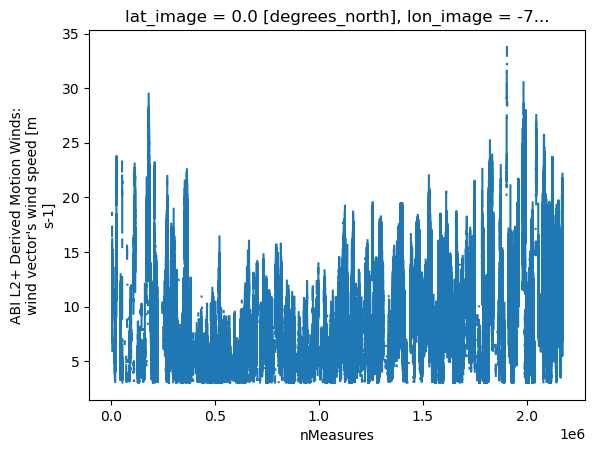

In [6]:
data['wind_speed'].plot()

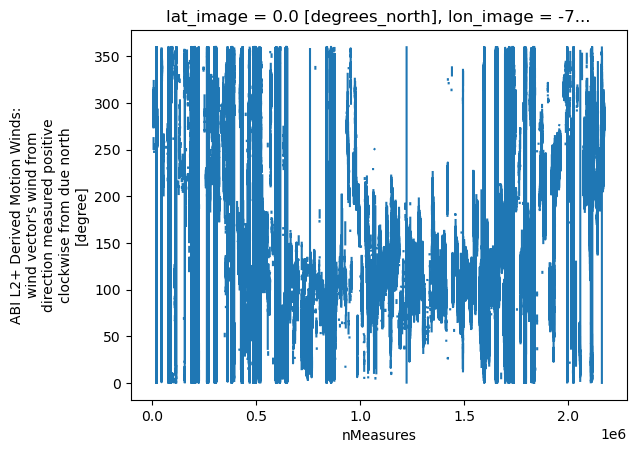

In [13]:
data['wind_direction'].plot()

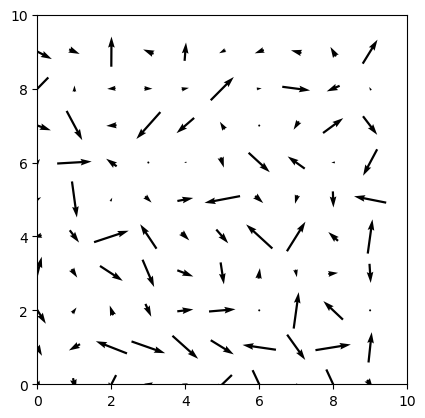

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
magnitudes = np.random.rand(10, 10)  # Magnitudes
directions_deg = np.random.rand(10, 10) * 360  # Directions in degrees

# Convert degrees to radians for trigonometric functions
directions_rad = np.deg2rad(directions_deg)

# Convert polar coordinates to Cartesian components
x = magnitudes * np.cos(directions_rad)
y = magnitudes * np.sin(directions_rad)

# Create a grid
x_grid, y_grid = np.meshgrid(np.arange(0, 10), np.arange(0, 10))

# Plot the vector field
plt.quiver(x_grid, y_grid, x, y, angles='xy', scale_units='xy', scale=1, pivot='mid')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio

# Show the plot
plt.show()


ValueError: Argument U has a size 500 which does not match 250000, the number of arrow positions

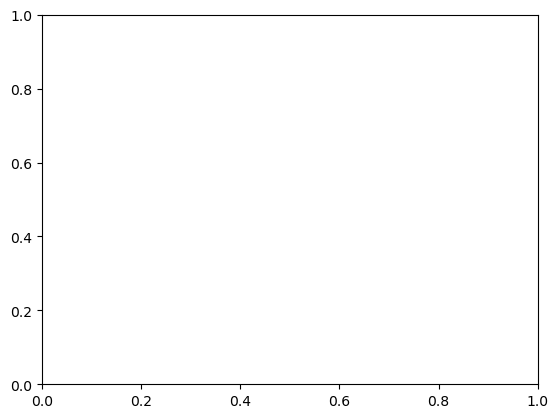

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
magnitudes = data['wind_speed'].values[:500]  # Magnitudes
directions_deg = data['wind_direction'].values[:500]  # Directions in degrees

# Convert degrees to radians for trigonometric functions
directions_rad = np.deg2rad(directions_deg)

# Convert polar coordinates to Cartesian components
x = magnitudes * np.cos(directions_rad)
y = magnitudes * np.sin(directions_rad)

# Create a grid
x_grid, y_grid = np.meshgrid(data['lon'].values[:500], data['lat'].values[:500])

# Plot the vector field
plt.quiver(x_grid, y_grid, x, y)

# Show the plot
plt.show()


In [84]:
#==================== Setting up time reference variables ====================
from datetime import datetime, timedelta
import pytz, time
utc = pytz.timezone('UTC') # UTC timezone
utcm5 = pytz.timezone('America/Lima') # UTC-5 timezone

#==================== Getting information from GOES image dataset ====================
import numpy as np
varname = list(data.data_vars.keys())[0]
ImgTime = data.t.values
ImgTime = utc.localize(datetime.utcfromtimestamp(ImgTime.tolist()//10**9))
minute = str(ImgTime.minute).zfill(2)
str_ImgTime = ImgTime.strftime('%Y-%m-%d %H:%M %Z')

spatial_res = data.attrs["spatial_resolution"].split()[0]
spatial_res = float(re.findall('\d+',spatial_res)[0])

LonCenter = data.geospatial_lat_lon_extent.geospatial_lon_center
LatCenter = data.geospatial_lat_lon_extent.geospatial_lat_center
LonLimits = np.array([data.geospatial_lat_lon_extent.geospatial_westbound_longitude, data.geospatial_lat_lon_extent.geospatial_eastbound_longitude])
LatLimits = np.array([data.geospatial_lat_lon_extent.geospatial_southbound_latitude, data.geospatial_lat_lon_extent.geospatial_northbound_latitude])
imgExtention = [LonLimits[0], LonLimits[1], LatLimits[0], LatLimits[1]]
PeruLimits_deg = [-85, -67.5, -20.5, 1.0] # Define the coordinates of the bounding box around Peru

print("Variable name: {}\n"
      "Longitude Limits: {} \n"
      "Latitude Limits: {}\n"
      "(LonCenter,LatCenter): {}".format(varname,LonLimits,LatLimits,(LonCenter,LatCenter)))

#==================== Creating georeferenced variables ====================
import geopandas as gpd
from shapely.geometry import Polygon
import cartopy.feature as cfeature
# Add coastlines feature
coastlines_feature = cfeature.NaturalEarthFeature(
    category='physical',
    name='coastline',
    scale='50m',
    edgecolor='black',
    facecolor='none')
# Add country boundaries feature
countries_feature = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none')

# Create the polygon representing the bounding box
peru_bbox = Polygon([(PeruLimits_deg[0], PeruLimits_deg[2]), (PeruLimits_deg[1], PeruLimits_deg[2]), (PeruLimits_deg[1], PeruLimits_deg[3]), (PeruLimits_deg[0], PeruLimits_deg[3])])
# gdf_countries = gpd.read_file("./Boundaries/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
gdf_maritime = gpd.read_file("./Boundaries/World_EEZ_v11_20191118/eez_v11.shp",mask=peru_bbox)
gdf_states = gpd.read_file("./Boundaries/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp",mask=peru_bbox)

# Filter the GeoDataFrame to keep only rows where adm1_code matches "PER"
gdf_peru_land = gdf_states[gdf_states["adm1_code"].str[:3] == "PER"]
gdf_peru_sea = gdf_maritime[gdf_maritime["TERRITORY1"] == "Peru"].iloc[[1]]
# gdf_maritime = gdf_maritime[gdf_maritime["TERRITORY1"] != "Peru"]

#==================== Defining projections ====================
import cartopy.crs as ccrs
map_proj_ortho = ccrs.Orthographic(central_longitude=LonCenter, central_latitude=LatCenter), "Orthographic"
map_proj_pc = ccrs.PlateCarree(), "PlateCarree projection"
if (coords == "lonlat"):
    gproj = data['goes_lat_lon_projection']
    map_proj_geos = ccrs.Geostationary(
                  central_longitude=LonCenter,
                  satellite_height=data.nominal_satellite_height.values*1000,
                  sweep_axis='x',
                  globe=ccrs.Globe(ellipse='sphere', # 'sphere', 'WGS84'
                              semimajor_axis=gproj.semi_major_axis, 
                              semiminor_axis=gproj.semi_minor_axis)), "Geostationary projection"
    map_proj_src = map_proj_pc
    map_proj_dst = map_proj_geos
elif (coords == "xy"):
    gproj = data['goes_imager_projection']
    map_proj_geos = ccrs.Geostationary(
                    central_longitude=LonCenter,
                    satellite_height=data.nominal_satellite_height.values*1000,
                    sweep_axis=gproj.sweep_angle_axis,
                    globe=ccrs.Globe(ellipse='sphere', # 'sphere', 'WGS84'
                                    semimajor_axis=gproj.semi_major_axis, 
                                    semiminor_axis=gproj.semi_minor_axis)), "Geostationary projection"
    map_proj_src = map_proj_geos
    map_proj_dst = map_proj_pc

Variable name: LST
Longitude Limits: [-156.2995    6.2995] 
Latitude Limits: [-81.3282  81.3282]
(LonCenter,LatCenter): (-75.0, 0.0)


### Transforming array projections with plots

In [85]:
from GOESutils.GOESplots import *
colormaps = definingColormaps()
product_cmap = colormaps[selected_product]

{'ABI-L2-DSRF': 'turbo',
 'ABI-L2-ACMF': <colormaps.colormap.Colormap at 0x26a23763590>,
 'ABI-L2-TPWF': 'terrain',
 'ABI-L2-LSTF': 'jet',
 'ABI-L2-RRQPEF': <colormaps.colormap.Colormap at 0x26a23744650>,
 'ABI-L2-ACHAF': <colormaps.colormap.Colormap at 0x26a23873450>,
 'ABI-L2-ACHTF': 'jet',
 'ABI-L2-ACTPF': <colormaps.colormap.Colormap at 0x26a23764d90>}

In [53]:
import importlib, sys
importlib.reload(sys.modules['myfunctions.GOESfunctions'])
from myfunctions.GOESfunctions import *

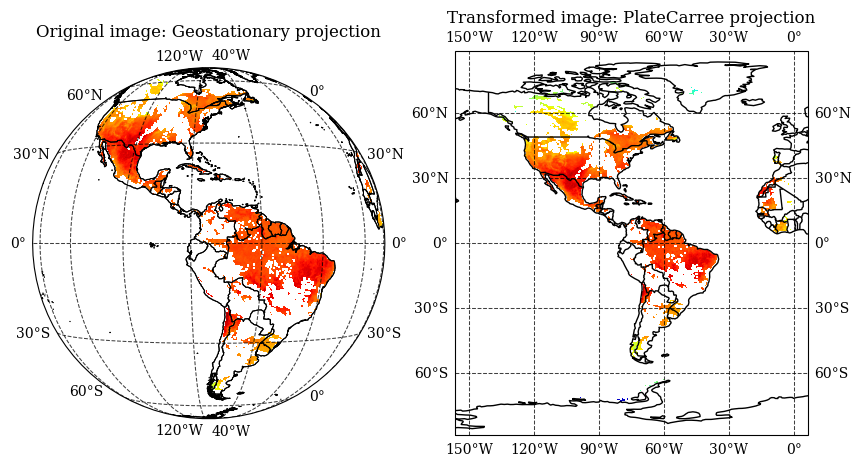

In [86]:
transformed_data, extent_deg = plotBothProjections(data,globals())

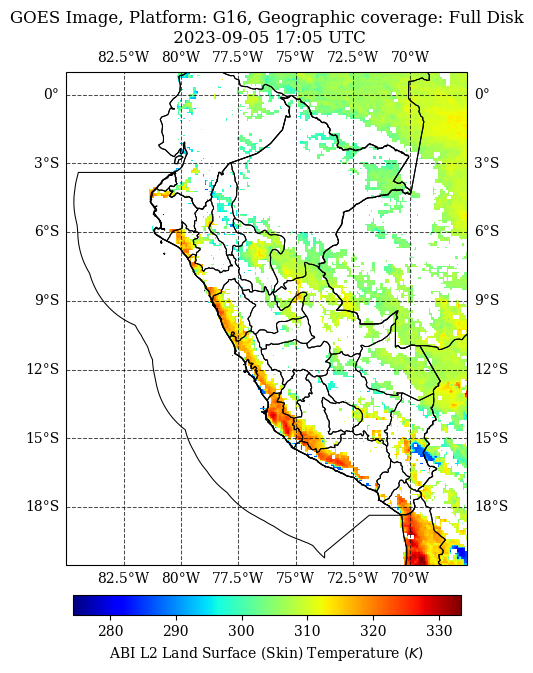

Image 'goes16_2023_09_05_LSTF_17_05.png' saved in '.\GOESimages\goes16\2023\09\05\ABI-L2-LSTF\17'


In [87]:
plotSatImg(data,globals())

(1086, 1086)
(10860, 10860)


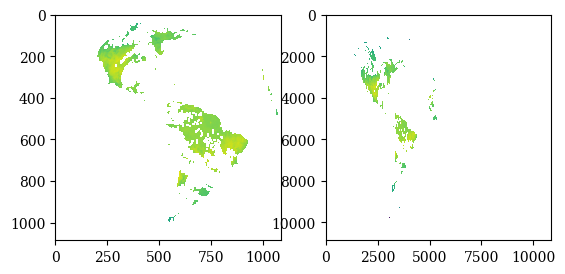

In [93]:
from cartopy.img_transform import warp_array
olddata = data[varname].values
data_shape = 10*np.array([olddata.shape[0],olddata.shape[1]])
newdata, new_extent = warp_array(olddata, map_proj_dst[0], map_proj_src[0], target_res = data_shape) # , target_extent=PeruLimits_deg
fig, [ax1, ax2] = plt.subplots(1,2)
print(olddata.shape)
ax1.imshow(olddata)
print(newdata.shape)
ax2.imshow(newdata)

# Reading with rioxarray

In [1]:
#==================== We set product parameters to download ====================
import os, re
destination_path = '.\\GOESimages\\'
product_list = { # ABI Products
"ABI-L2-ACMF": "Clear Sky Mask",
"ABI-L2-ACHAF": "Cloud Top Height",
"ABI-L2-ACTPF": "Cloud Top Phase",
"ABI-L2-ACHTF": "Cloud Top Temperature",
"ABI-L2-LSTF": "Land Surface Temperature",
"ABI-L2-RRQPEF": "Rainfall rate",
"ABI-L2-DSRF": "Downward Shortwave Radiation",
"ABI-L2-DMWVF": "Derived Motion Winds - Vapor"
}

import goes2go as g2g

import numpy as np
from GOESutils.GOESplots import *
colormaps = definingColormaps(False)
import copy
import cartopy.crs as ccrs
import datetime, pytz
map_proj_pc = ccrs.PlateCarree(), "PlateCarree projection"
utc = pytz.timezone('UTC') # UTC timezone
utcm5 = pytz.timezone('America/Lima') # UTC-5 timezone
current_datetime = datetime.datetime.now() + datetime.timedelta(hours=5)#datetime.datetime(2023, 9, 10, 21) # 
display(current_datetime)

c:\Users\germa\anaconda3\envs\satimg\Lib\site-packages\toolbox\cartopy_tools_OLD.py:37: UserWarning: Migrate to new `cartopy_tools` for latest updates and features.
  warnings.warn("Migrate to new `cartopy_tools` for latest updates and features.")
c:\Users\germa\anaconda3\envs\satimg\Lib\site-packages\toolbox\cartopy_tools_OLD.py:241: AccessorRegistrationWarning: registration of accessor <class 'toolbox.cartopy_tools_OLD.xr_to_cartopy'> under name 'xmap' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("xmap")


datetime.datetime(2023, 9, 18, 21, 35, 46, 264671)

 👮🏻‍♂️ File already exists. Do not overwrite: GOESimages\noaa-goes16\ABI-L2-MCMIPF\2023\261\21\OR_ABI-L2-MCMIPF-M6_G16_s20232612120203_e20232612129523_c20232612129595.nc
📦 Finished downloading [1] files to [GOESimages\noaa-goes16\ABI-L2-MCMIPF].
Getting latest available
It is daytime! Plotting NaturalColor image...


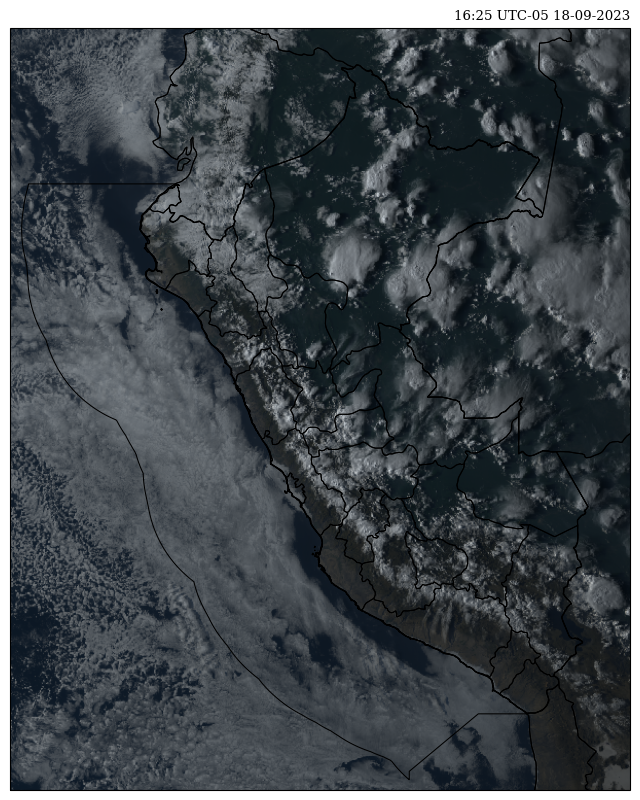

In [2]:
figGeo, axGeo = GeoColorPlot(destination_path)

In [6]:
import importlib, sys
importlib.reload(sys.modules['GOESutils.GOESplots'])
from GOESutils.GOESplots import *
import colormaps as cmaps
product_cmap = colormaps[selected_product]

In [18]:
datetime.datetime.utcnow().replace(tzinfo = utc).astimezone(utcm5)

datetime.datetime(2023, 9, 18, 16, 41, 25, 180889, tzinfo=<DstTzInfo 'America/Lima' -05-1 day, 19:00:00 STD>)

In [17]:
ProductParams["ImgTime"]

datetime.datetime(2023, 9, 18, 16, 5, 5, 700000, tzinfo=<DstTzInfo 'America/Lima' -05-1 day, 19:00:00 STD>)

 👮🏻‍♂️ File already exists. Do not overwrite: GOESimages\noaa-goes16\ABI-L2-DSRF\2023\261\21\OR_ABI-L2-DSRF-M6_G16_s20232612100203_e20232612109511_c20232612124461.nc
📦 Finished downloading [1] files to [GOESimages\noaa-goes16\ABI-L2-DSRF].


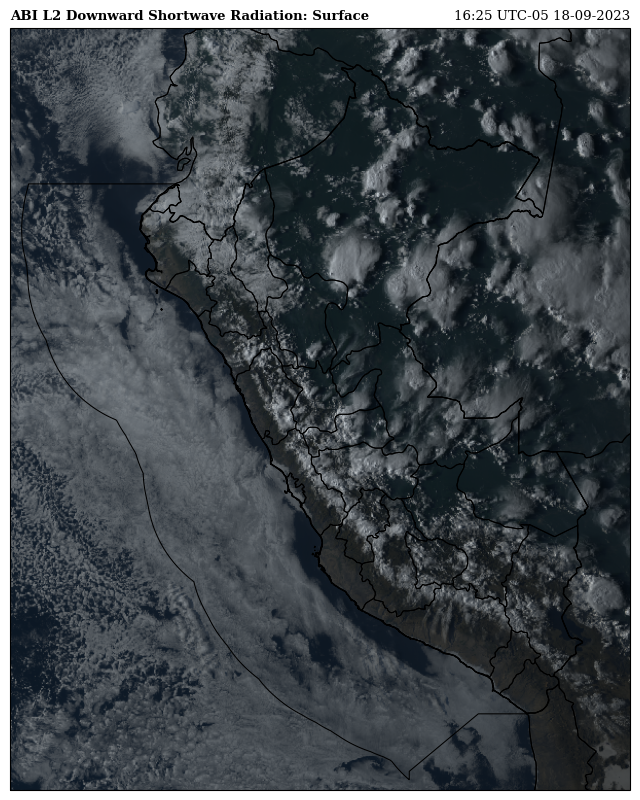

In [15]:
selected_product = list(product_list)[-2]
# Download Level-2 derived motion wind ABI product
prodFileList = g2g.data.goes_nearesttime(datetime.datetime.utcnow(),satellite='noaa-goes16', product=selected_product, domain='F', download=True, save_dir=destination_path, return_as='filelist')
data_re, ProductParams = ProductData(os.path.join(destination_path,prodFileList['file'][0]), selected_product)
ProductPlot(data_re, selected_product, axGeo, ProductParams, toSave=False)

In [3]:
try: 
    prodFileList = g2g.data.goes_latest(satellite='noaa-goes16', product=selected_product, domain='F', download=True, save_dir=destination_path, return_as='filelist')
    print("Getting latest available")
except ValueError: 
    prodFileList = g2g.data.goes_nearesttime(current_datetime, satellite='noaa-goes16', product=selected_product, domain='F', download=True, save_dir=destination_path, return_as='filelist')
    print("Getting nearest available")
rds = xr.open_dataset(os.path.join(destination_path,prodFileList['file'][0]), engine='rasterio')
# rds_re, ProductParams = ProductData(rds, selected_product)
# ProductPlot(rds_re, selected_product, ax, ProductParams)


# identifier = selected_product.split("-")[-1][:-1]

# ProductParams = get_image_params(rds, identifier)
# varname = ProductParams["VarNames"][0]
# rds = rds.isel(band=0)[varname]
# rds_re = rds.rio.reproject(map_proj_pc[0], resolution=1/111.32)
# rds_re = rds_re.sel(x=slice(PeruLimits_deg[0], PeruLimits_deg[1]), y=slice(PeruLimits_deg[3], PeruLimits_deg[2]))

📦 Finished downloading [4] files to [GOESimages\noaa-goes16\ABI-L2-DMWF].
Getting latest available


RasterioIOError: '.\GOESimages\noaa-goes16/ABI-L2-DMWF/2023/260/05/OR_ABI-L2-DMWF-M6C02_G16_s20232600500205_e20232600509513_c20232600527141.nc' not recognized as a supported file format.

(160, 131)
(11967, 9740)


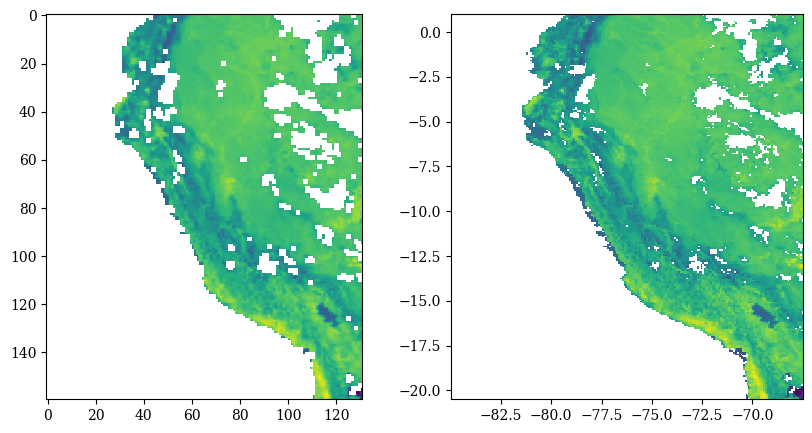

In [107]:
PeruLimits_deg = [-85, -67.5, -20.5, 1.0] # Define the coordinates of the bounding box around Peru
rds = xr.open_dataset(os.path.join(destination_path,prodFileList['file'][0]), engine='rasterio')
fig, [ax1, ax2] = plt.subplots(1,2,figsize=[10,5])
rds = rds.isel(band=0)['LST']
rds_re = rds.rio.reproject(map_proj_pc[0])
[shpx, shpy] = rds_re.shape
rds_re = rds_re.sel(x=slice(PeruLimits_deg[0], PeruLimits_deg[1]), y=slice(PeruLimits_deg[3], PeruLimits_deg[2]))
print(rds_re.shape)
ax1.pcolormesh(rds_re.x,rds_re.y,rds_re)
ax1.imshow(rds_re)
rds_re = rds.rio.reproject(map_proj_pc[0], resolution=0.2/111.32)
rds_re = rds_re.sel(x=slice(PeruLimits_deg[0], PeruLimits_deg[1]), y=slice(PeruLimits_deg[3], PeruLimits_deg[2]))
print(rds_re.shape)
ax2.pcolormesh(rds_re.x,rds_re.y,rds_re)

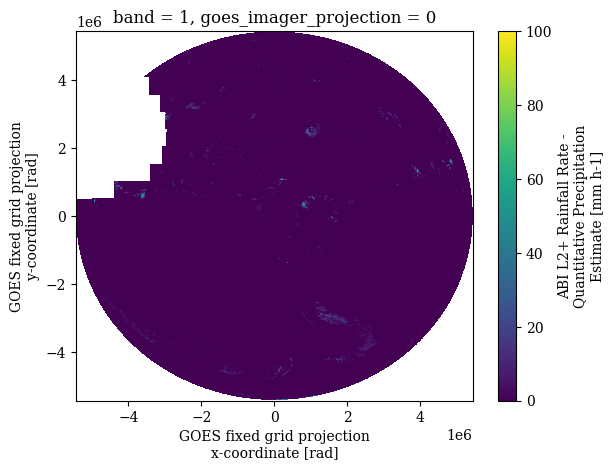

In [23]:
rds['DSR'].plot()

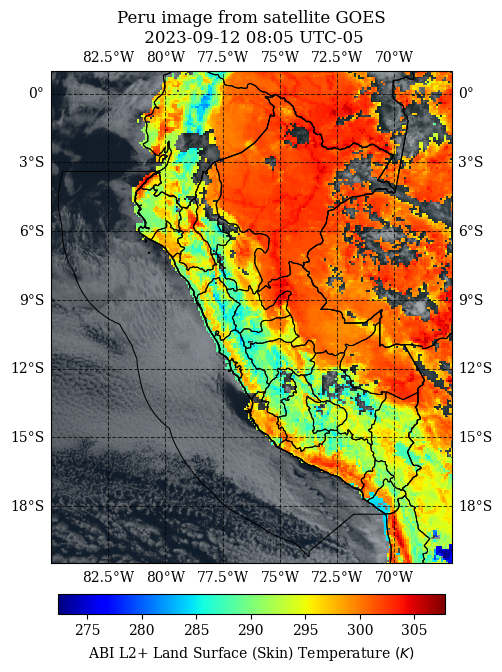

In [7]:
import importlib, sys
importlib.reload(sys.modules['GOESutils.GOESplots'])
from GOESutils.GOESplots import *

ProductPlot(rds_re, selected_product, ax, ProductParams)

### Transforming array projections with functions

In [77]:
department_names

['Amazonas',
 'Ancash',
 'Apurímac',
 'Arequipa',
 'Ayacucho',
 'Cajamarca',
 'Callao',
 'Cusco',
 'Huancavelica',
 'Huánuco',
 'Ica',
 'Junín',
 'La Libertad',
 'Lambayeque',
 'Lima',
 'Lima Province',
 'Loreto',
 'Madre de Dios',
 'Moquegua',
 'Pasco',
 'Piura',
 'Puno',
 'San Martín',
 'Tacna',
 'Tumbes',
 'Ucayali']

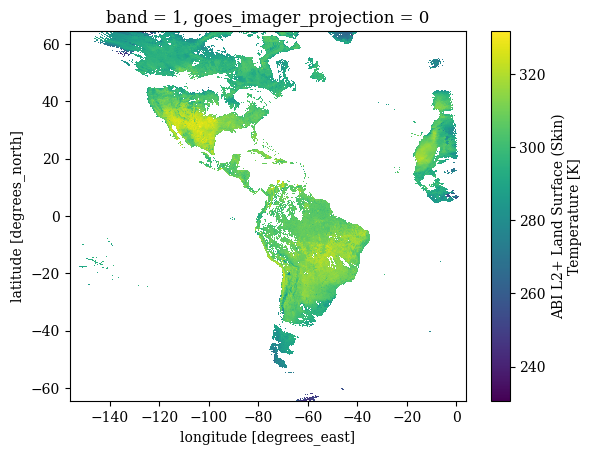

In [162]:
gdf_peru_land = gpd.read_file("./Boundaries/PER_adm/PER_adm1.shp")
department_names = sorted(gdf_peru_land['NAME_1'].tolist()).remove('Callao')
rds = xr.open_dataset(FullFilePath, engine='rasterio').isel(band=0).rio.reproject("EPSG:4326", resolution=10 / 111.32)
rds_peru = rds.sel(x=slice(PeruLimits_deg[0], PeruLimits_deg[1]), y=slice(PeruLimits_deg[3], PeruLimits_deg[2]))
rds[varname].plot()

<Axes: >

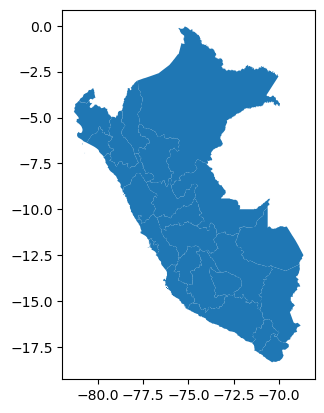

In [98]:
gdf_peru_land.plot()

In [105]:
# Filter GeoDataFrames
gdf_lima = gdf_peru_land[gdf_peru_land['NAME_1'].isin(['Lima', 'Lima Province', 'Callao'])]

# Union the geometries and dissolve based on 'NAME_1'
dissolved_gdf = gdf_lima.dissolve(by='NAME_1')

In [110]:
import pandas as pd
# Add the dissolved geometry back to the original GeoDataFrame
gdf_peru_land = pd.concat([gdf_peru_land, dissolved_gdf])

In [111]:
gdf_peru_land

ID_0  ISO NAME_0  ID_1         NAME_1     TYPE_1 ENGTYPE_1  \
0               178  PER   Peru     1       Amazonas     Región    Region   
1               178  PER   Peru     2         Ancash     Región    Region   
2               178  PER   Peru     3       Apurímac     Región    Region   
3               178  PER   Peru     4       Arequipa     Región    Region   
4               178  PER   Peru     5       Ayacucho     Región    Region   
5               178  PER   Peru     6      Cajamarca     Región    Region   
6               178  PER   Peru     7         Callao  Provincia  Province   
7               178  PER   Peru     8          Cusco     Región    Region   
8               178  PER   Peru     9        Huánuco     Región    Region   
9               178  PER   Peru    10   Huancavelica     Región    Region   
10              178  PER   Peru    11            Ica     Región    Region   
11              178  PER   Peru    12          Junín     Región    Region   
12              178  PER   Peru    13    La Libertad     Región    Region   
13              178  PER   Peru    14     Lambayeque     Región    Region   
14              178  PER   Peru    15  Lima Province  Provincia  Province   
15              178  PER   Peru    16           Lima     Región    Region   
16              178  PER   Peru    17         Loreto     Región    Region   
17              178  PER   Peru    18  Madre de Dios     Región    Region   
18              178  PER   Peru    19       Moquegua     Región    Region   
19              178  PER   Peru    20          Pasco     Región    Region   
20              178  PER   Peru    21          Piura     Región    Region   
21              178  PER   Peru    22           Puno     Región    Region   
22              178  PER   Peru    23     San Martín     Región    Region   
23              178  PER   Peru    24          Tacna     Región    Region   
24              178  PER   Peru    25         Tumbes     Región    Region   
25              178  PER   Peru    26        Ucayali     Región    Region   
Callao          178  PER   Peru     7            NaN  Provincia  Province   
Lima            178  PER   Peru    16            NaN     Región    Region   
Lima Province   178  PER   Peru    15            NaN  Provincia  Province   

               NL_NAME_1    VARNAME_1  \
0                    NaN          NaN   
1                    NaN      Ancachs   
2                    NaN     Apuromac   
3                    NaN          NaN   
4                    NaN          NaN   
5                    NaN    Caxamarca   
6                    NaN    El Callao   
7                    NaN  Cuzco|Qosqo   
8                    NaN      Huknuco   
9                    NaN          NaN   
10                   NaN          NaN   
11                   NaN        Junnn   
12                   NaN     Libertad   
13                   NaN          NaN   
14                   NaN          NaN   
15                   NaN          NaN   
16                   NaN          NaN   
17                   NaN          NaN   
18                   NaN          NaN   
19                   NaN          NaN   
20                   NaN          NaN   
21                   NaN          NaN   
22                   NaN     San Mart   
23                   NaN          NaN   
24                   NaN       Tumbez   
25                   NaN          NaN   
Callao               NaN    El Callao   
Lima                 NaN         None   
Lima Province        NaN         None   

                                                        geometry  
0              POLYGON ((-77.78945 -3.11416, -77.78954 -3.119...  
1              MULTIPOLYGON (((-78.24208 -9.89486, -78.24208 ...  
2              POLYGON ((-73.74701 -13.17419, -73.74563 -13.1...  
3              MULTIPOLYGON (((-73.23431 -16.41625, -73.23431...  
4              POLYGON ((-74.34711 -12.17459, -74.35155 -12.1...  
5              POLYGON ((-78.71419 -4.62458, -78.71140 -4.624...  
6   

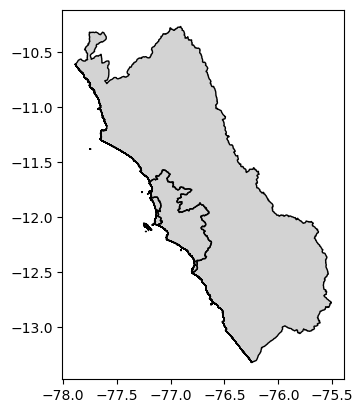

In [106]:
ax = dissolved_gdf.plot(color='lightgrey')
gdf_lima.plot(ax=ax, edgecolor='black', facecolor='none')  # Plot borders of individual regions

plt.show()

C:\Users\germa\AppData\Local\Temp\ipykernel_15264\2962121664.py:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


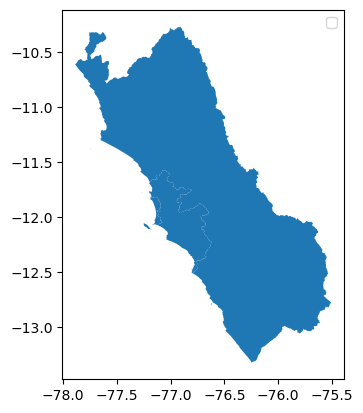

In [104]:
# Filter GeoDataFrames
gdf_lima = gdf_peru_land[gdf_peru_land['NAME_1'] == 'Lima']
gdf_lima_province = gdf_peru_land[gdf_peru_land['NAME_1'] == 'Lima Province']
gdf_callao = gdf_peru_land[gdf_peru_land['NAME_1'] == 'Callao']

# Create a single plot and plot the GeoDataFrames
fig, ax = plt.subplots()
# gdf_peru_land.plot(ax=ax, color='lightgrey')  # Plot the base map
gdf_lima.plot(ax=ax, label='Lima')
gdf_lima_province.plot(ax=ax, label='Lima Province')
gdf_callao.plot(ax=ax, label='Callao')

# Add legend
ax.legend()

plt.show()

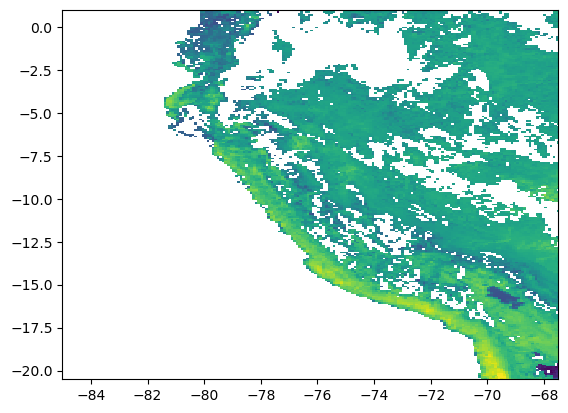

In [70]:
from cartopy.img_transform import warp_array
olddata= np.flip(rds[varname].values,0)
data_shape = (olddata.shape[0],olddata.shape[1])
# data_shape = (400, 200)
newdata, new_extent = warp_array(olddata, map_proj_dst[0], map_proj_src[0], target_res = data_shape, target_extent=PeruLimits_deg)
lon1D = np.linspace(new_extent[0], new_extent[1], data_shape[0])
lat1D = np.linspace(new_extent[2], new_extent[3], data_shape[1])
lon2D, lat2D = np.meshgrid(lon1D, lat1D)
plt.pcolormesh(lon2D, lat2D, newdata.data)

# from shapely.geometry import Point
# # Create an array of Point objects using the meshgrid coordinates
# points = [Point(lon, lat) for lon, lat in zip(lon2D.ravel(), lat2D.ravel())]
# # Create a boolean mask indicating which points are inside the polygon
# polygon = gdf_peru_land[gdf_peru_land['name'] == "Loreto"]['geometry']
# points_inside_polygon_mask = np.array([polygon.contains(point) for point in points])
# # Reshape the mask to match the shape of the data array
# points_inside_polygon_mask = points_inside_polygon_mask.reshape(lon2D.shape)
# import numpy.ma as ma
# data_masked = ma.array(newdata, mask=~points_inside_polygon_mask)
# # Get the indices of the unmasked (relevant) region inside the polygon
# min_lon_index = np.where(points_inside_polygon_mask.any(axis=0))[0].min()
# max_lon_index = np.where(points_inside_polygon_mask.any(axis=0))[0].max()
# min_lat_index = np.where(points_inside_polygon_mask.any(axis=1))[0].min()
# max_lat_index = np.where(points_inside_polygon_mask.any(axis=1))[0].max()

# # Extract the relevant portion of the array
# reduced_array = data_masked[min_lat_index:max_lat_index + 1, min_lon_index:max_lon_index + 1]
# lon2D_reduced = lon2D[min_lat_index:max_lat_index + 1, min_lon_index:max_lon_index + 1]
# lat2D_reduced = lat2D[min_lat_index:max_lat_index + 1, min_lon_index:max_lon_index + 1]

# plt.pcolormesh(lon2D_reduced,lat2D_reduced,reduced_array)

In [ ]:
for department in department_names:
    # outputs_directory = os.path.join(ImagesPath,"Departments",selected_product, department)
    # ImageName = '_'.join([selected_product,department,year,month,day,hour,minute])
    # FullImagePath = os.path.join(outputs_directory,ImageName+'.tif')
    # os.makedirs(outputs_directory, exist_ok=True)
    polygon = gdf_peru_land[gdf_peru_land['NAME_1']==department]['geometry']
    rds_clip = rds_peru[varname].rio.clip(polygon)

    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
    im = ax.pcolormesh(rds_clip.x,rds_clip.y,rds_clip.values)
    plt.colorbar(im, label = rds_clip.attrs['long_name']+' ['+rds_clip.attrs['units']+']')
    ax.set(title = 'Department: '+ department,
           xlabel = "Longitude",
           ylabel = "Latitude")
    ax.add_geometries(polygon, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black')
    ax.gridlines(draw_labels=True,lw=0.75,color='k',alpha=0.7,ls='--')

    # plt.savefig(FullImagePath,dpi=300,bbox_inches='tight')
    # plt.show()
#     data_array = xr.DataArray(data_clip.values, coords=[data_clip.y, data_clip.x], dims=['latitude', 'longitude'])
#     data_array.rio.write_crs("EPSG:4326")

C:\Users\germa\AppData\Local\Temp\ipykernel_15264\2488702619.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))


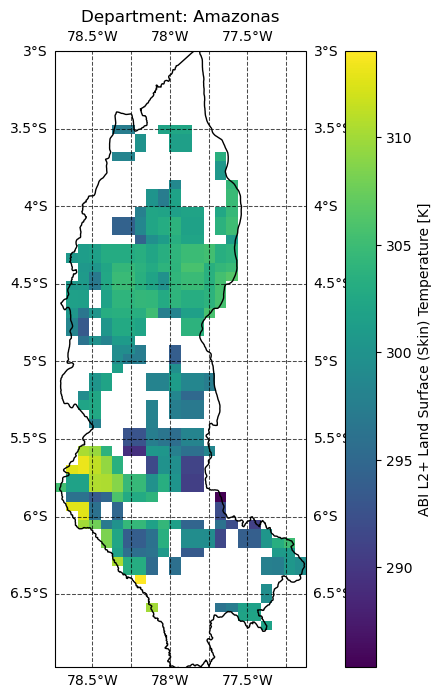

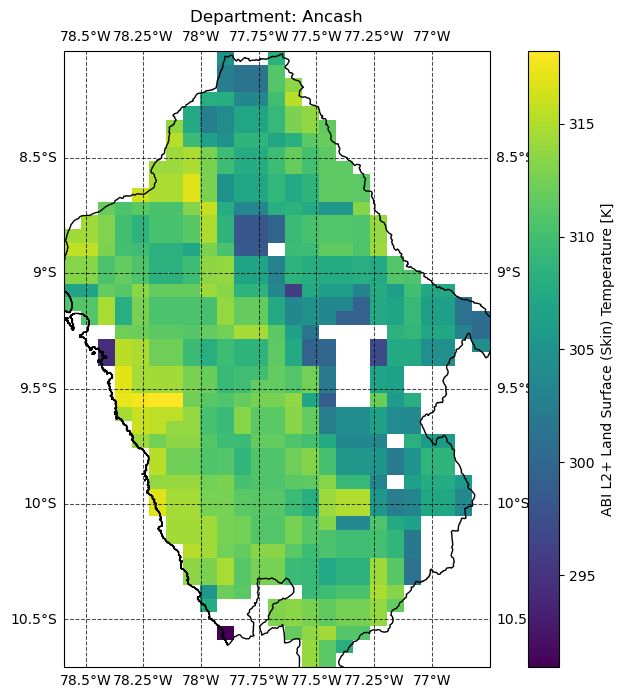

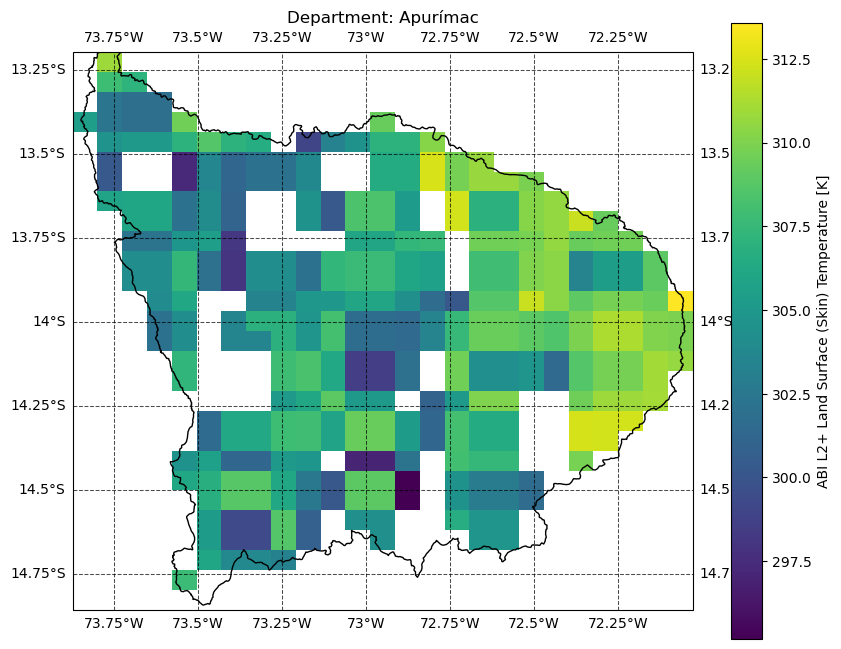

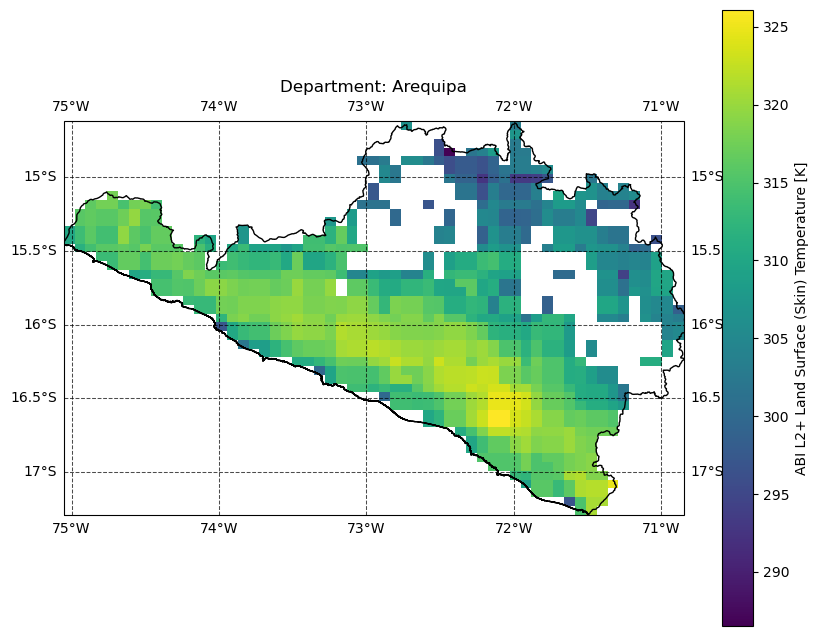

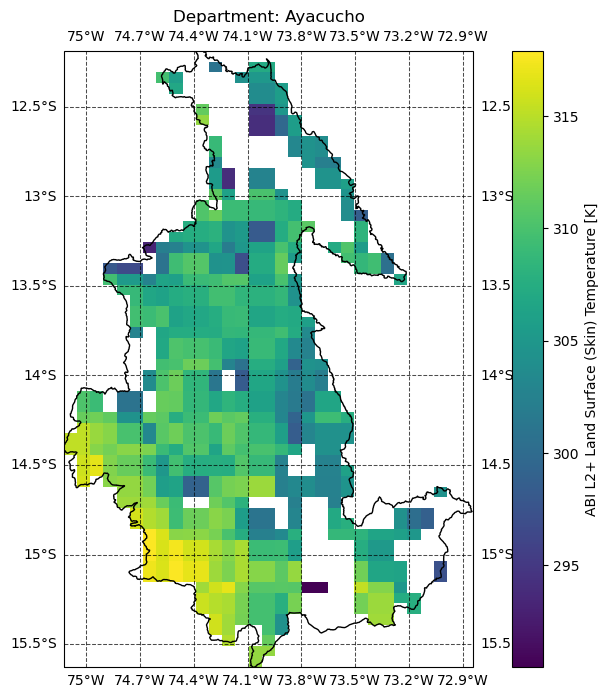

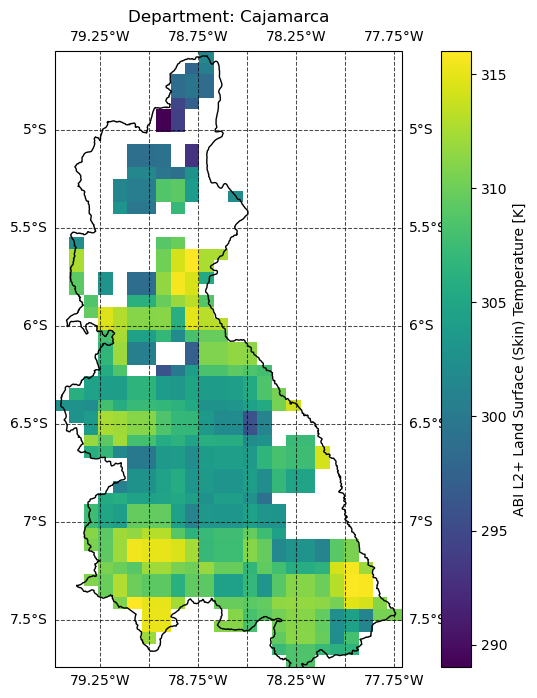

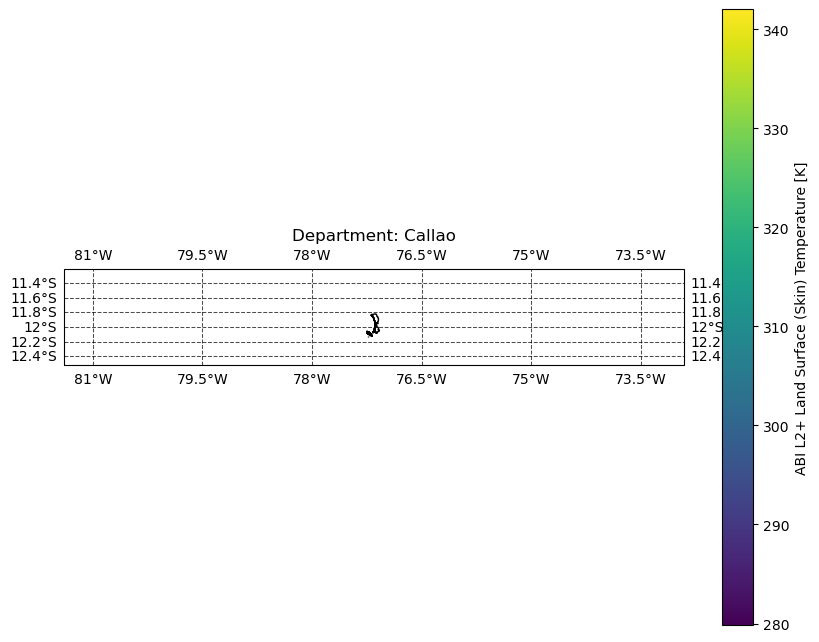

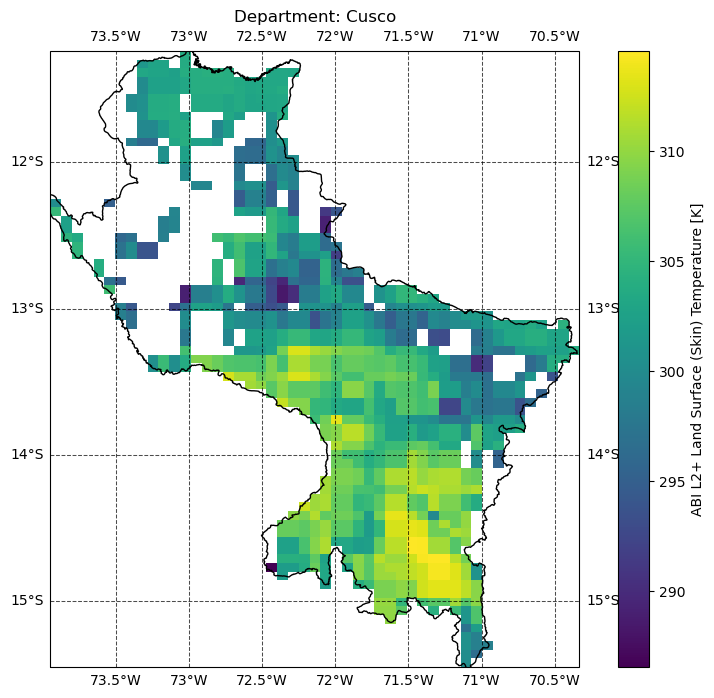

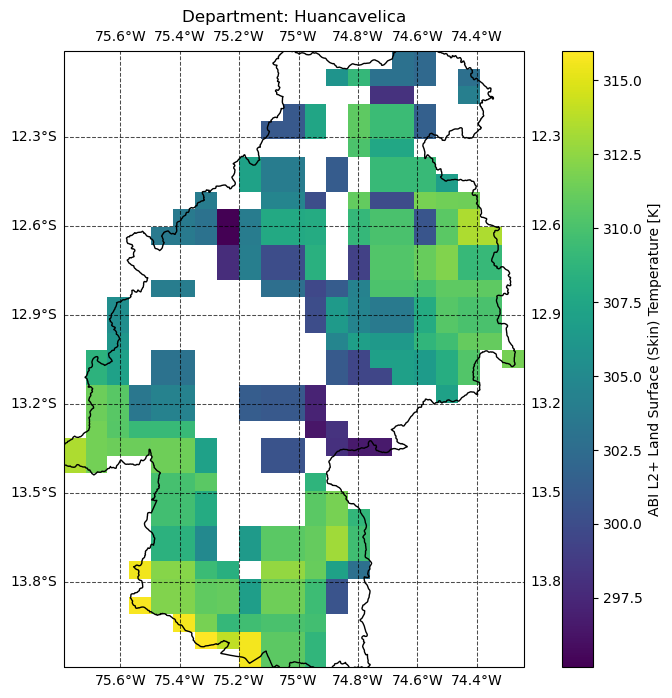

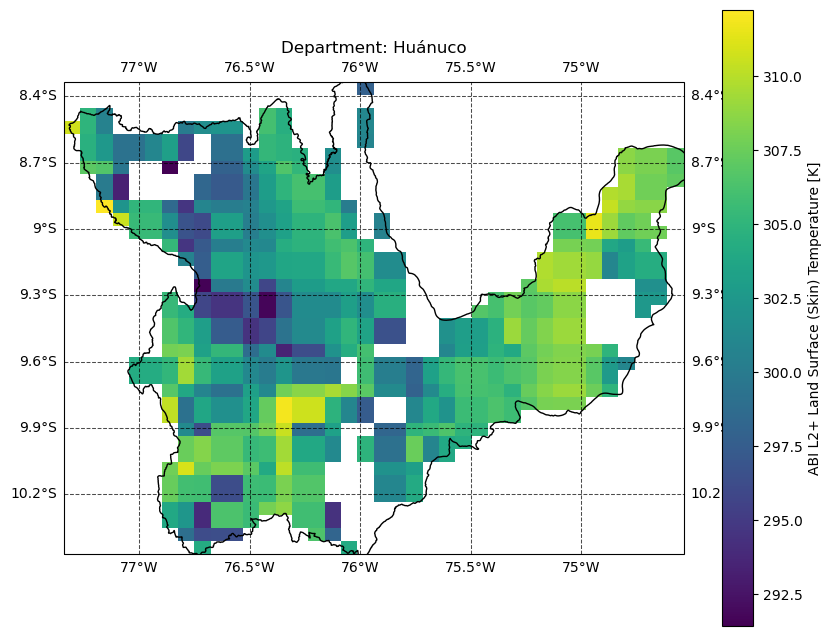

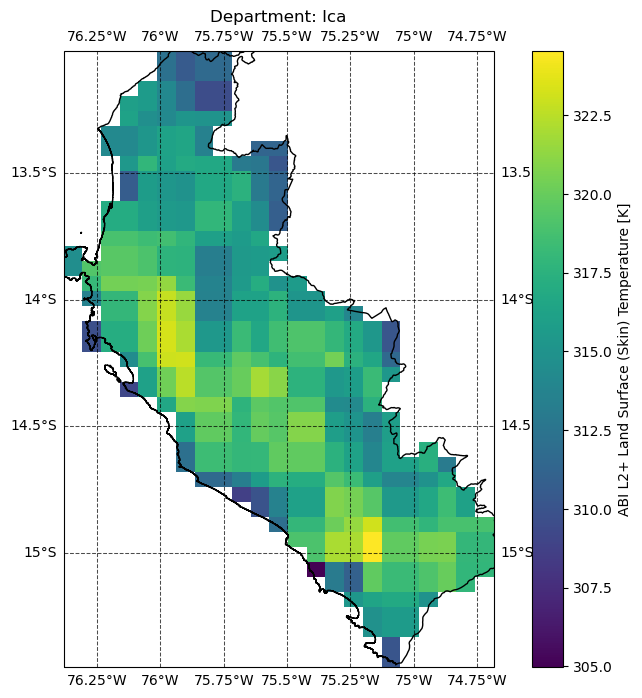

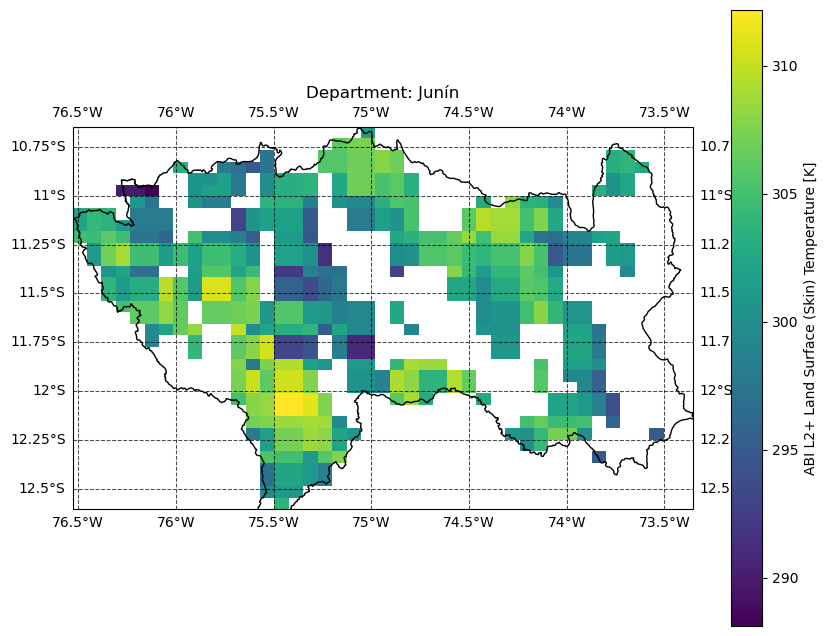

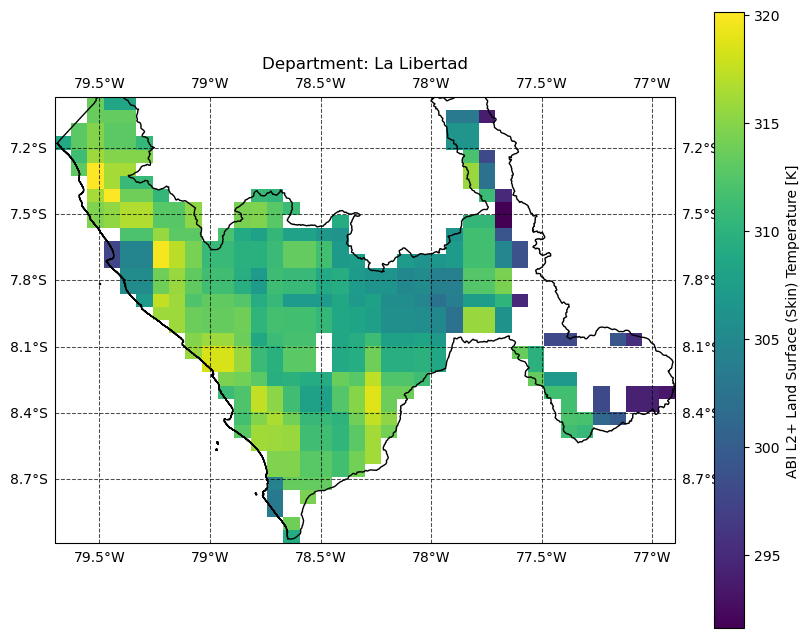

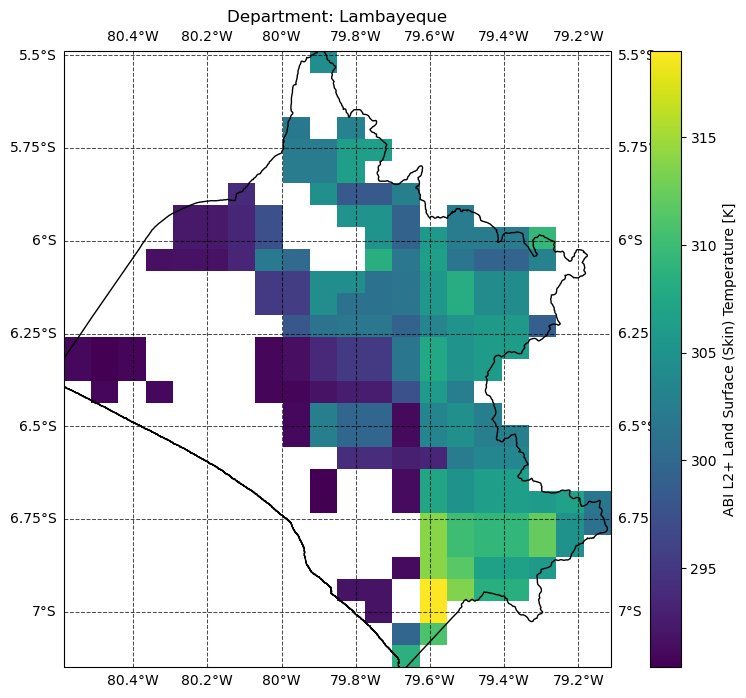

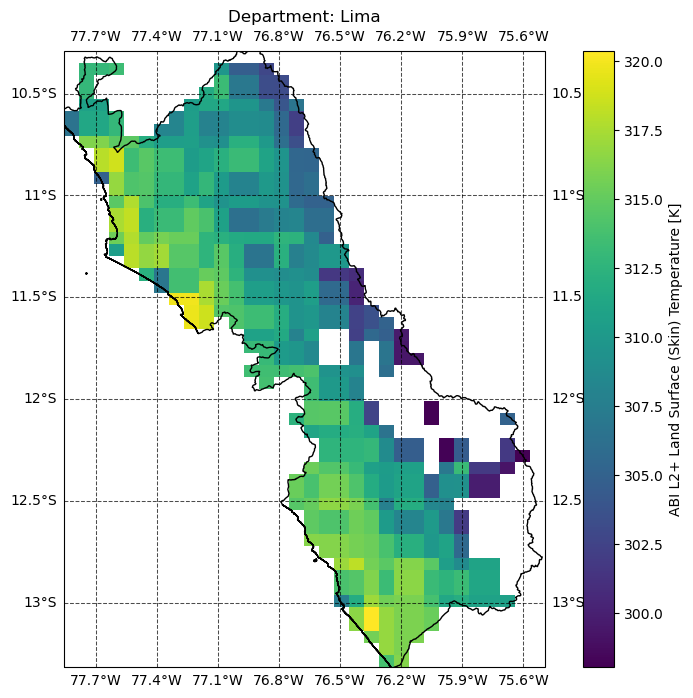

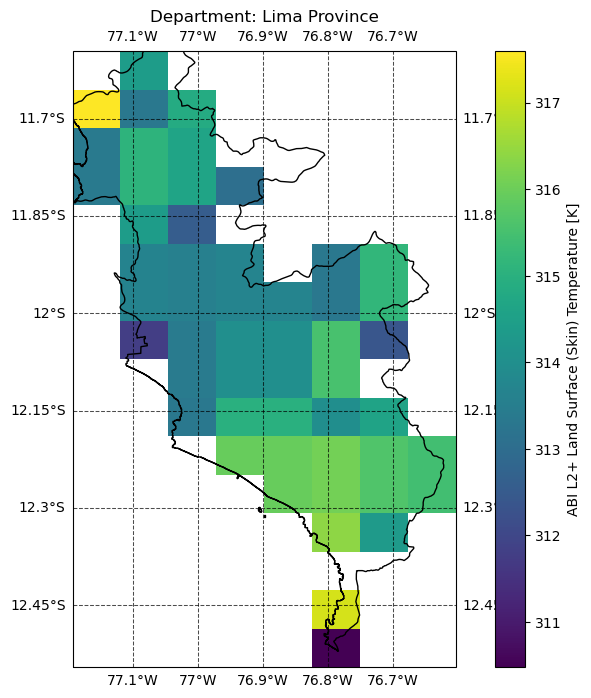

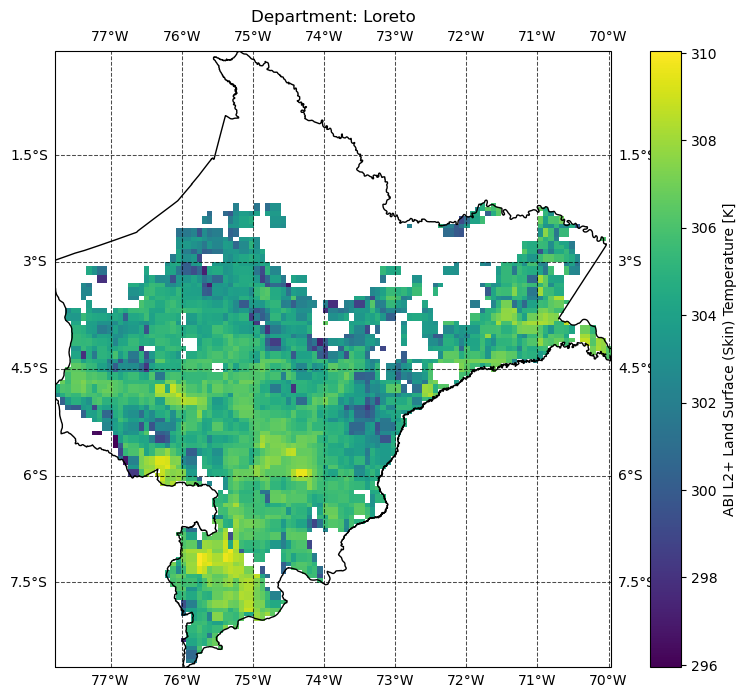

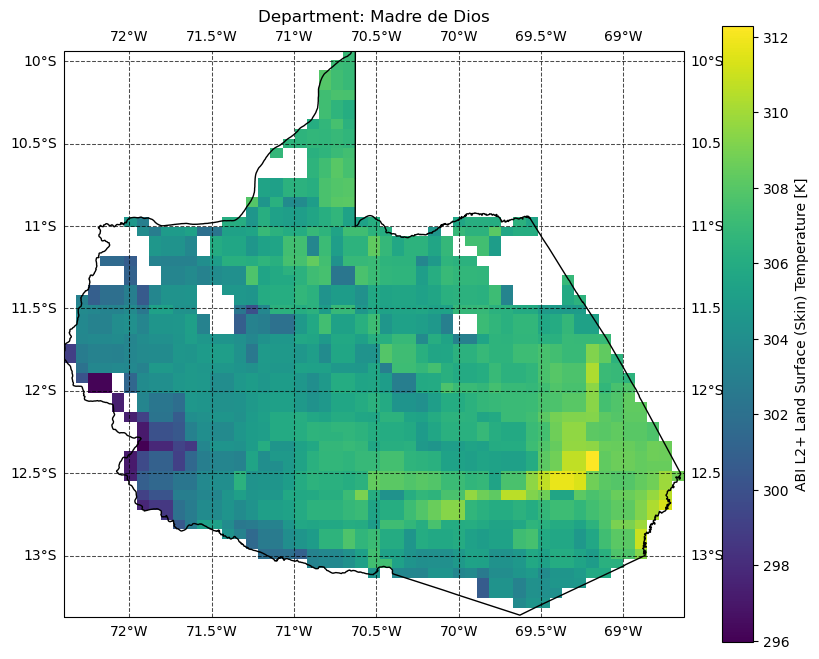

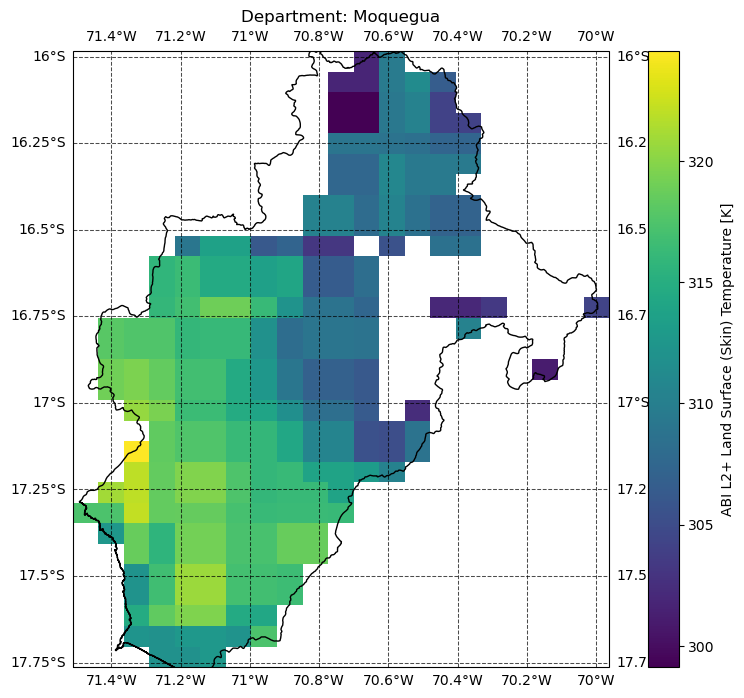

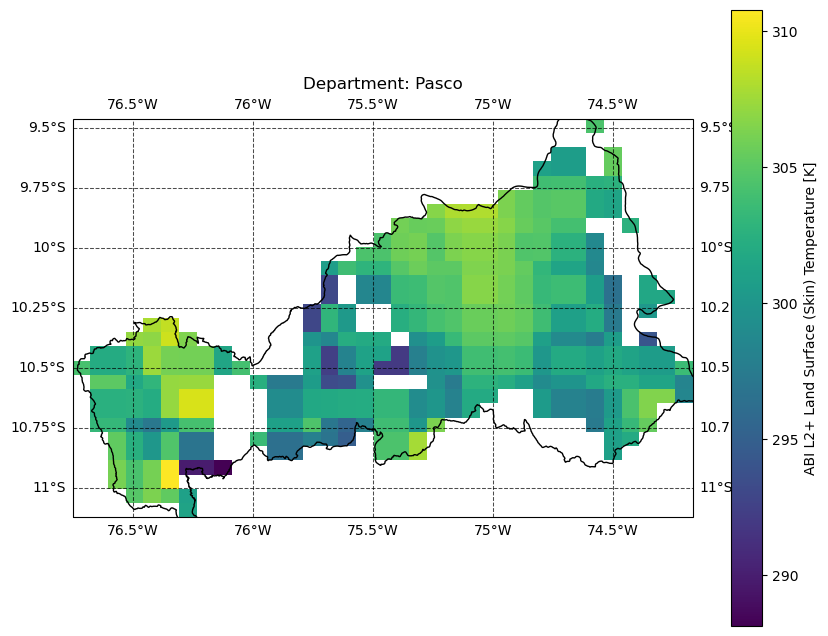

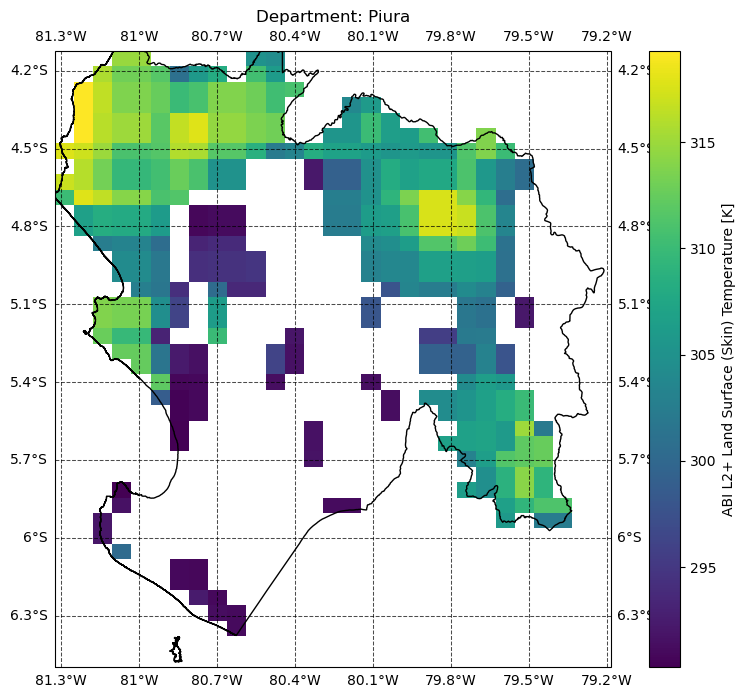

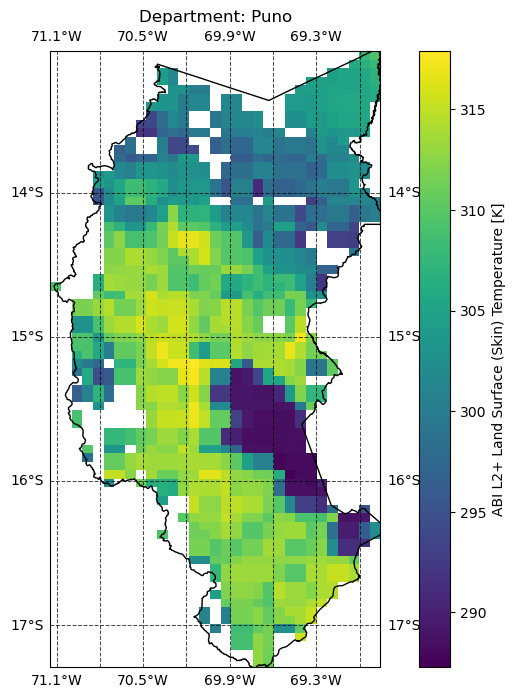

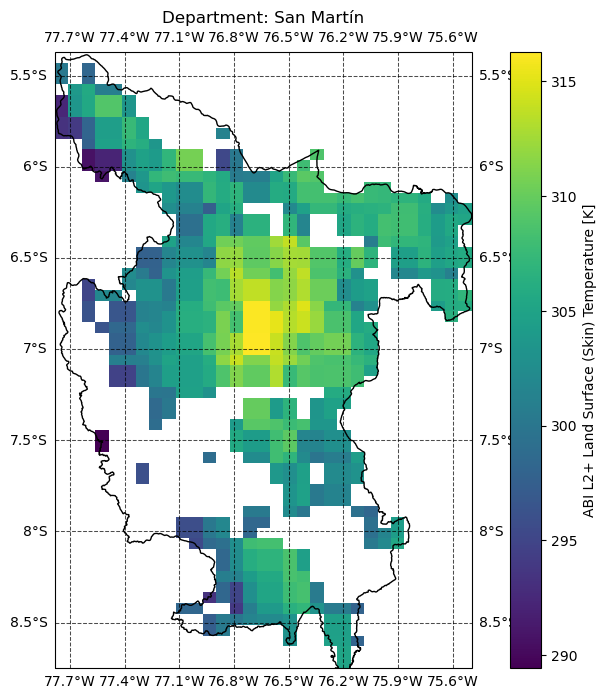

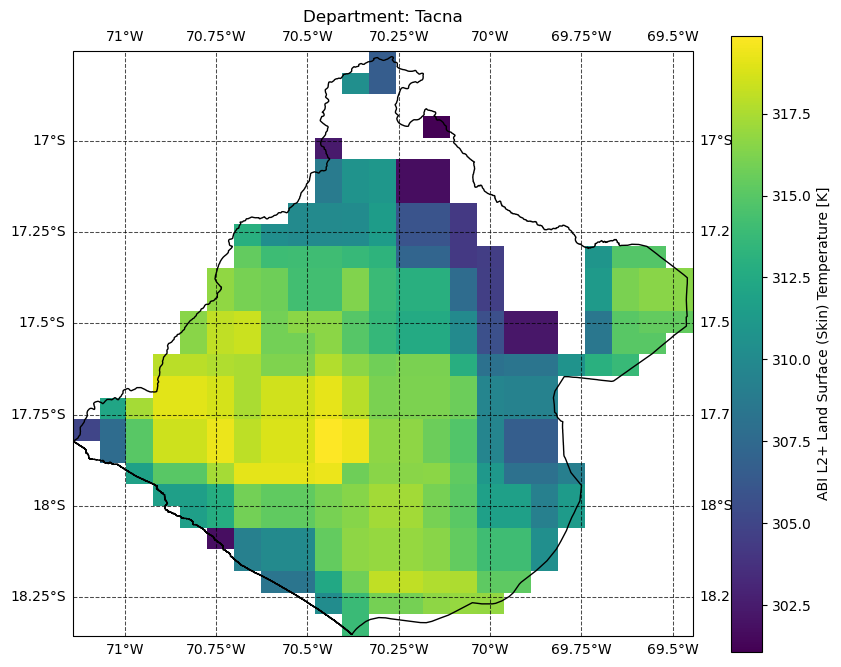

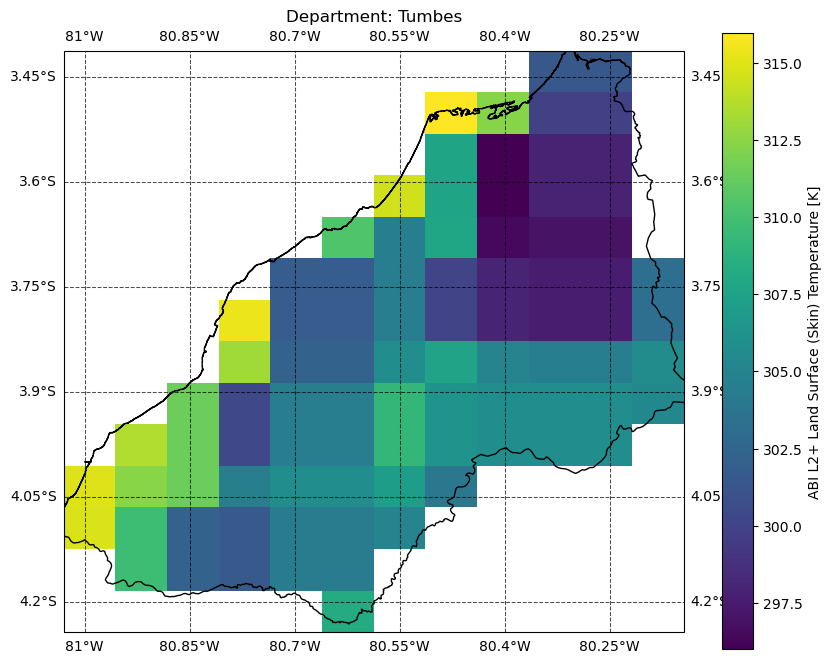

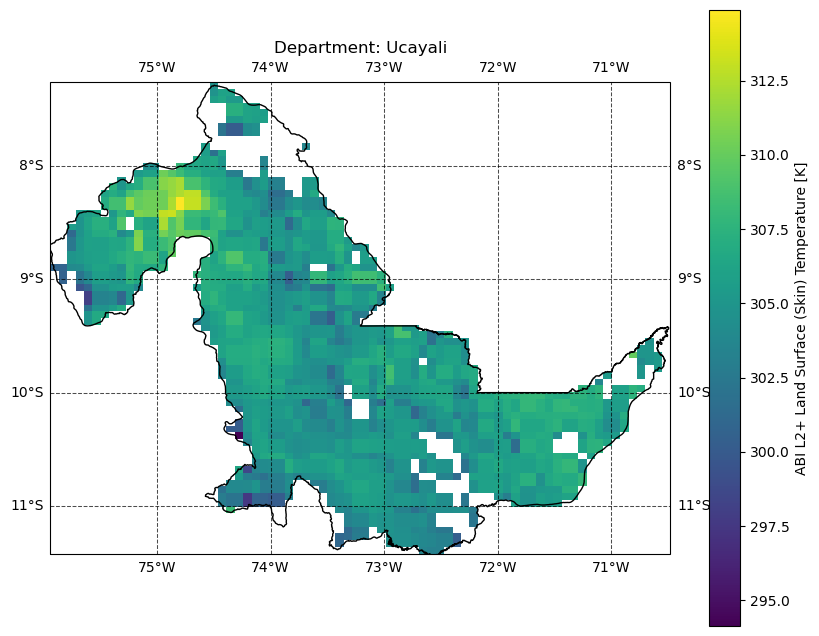

In [76]:
for department in department_names:
    polygon = gdf_peru_land[gdf_peru_land['NAME_1']==department]['geometry']
    rds_clip = rds_peru[varname].rio.clip(polygon)

    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.PlateCarree()))
    im = ax.pcolormesh(rds_clip.x,rds_clip.y,rds_clip.values)
    plt.colorbar(im, label = rds_clip.attrs['long_name']+' ['+rds_clip.attrs['units']+']')
    ax.set(title = 'Department: '+ department,
           xlabel = "Longitude",
           ylabel = "Latitude")
    ax.add_geometries(polygon, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black')
    ax.gridlines(draw_labels=True,lw=0.75,color='k',alpha=0.7,ls='--')

In [55]:
# import matplotlib.pyplot as plt

# ProductArray = data.values
# Lon, Lat = data.x, data.y
# fig, ax = plt.subplots()
# im = ax.pcolormesh(Lon,Lat,ProductArray)
# plt.colorbar(im, label = data.attrs['standard_name']+' ['+data.attrs['units']+']')
# ax.set(title = data.attrs['long_name'],
#        xlabel = "Longitude",
#        ylabel = "Latitude")
# plt.show()
# # data.rio.to_raster('example.tif')

In [56]:
# im2 = plt.contourf(lon,lat,data_clip.values,5)
# plt.colorbar()

# Uploading images to web

In [1]:
from firebase_admin import credentials, storage, initialize_app

ruta_credenciales = './Emision-Germain/key.json'
cred = credentials.Certificate(ruta_credenciales)
initialize_app(cred, {'storageBucket': 'eata-project.appspot.com'})

def subir(nombre_archivo, ruta_local, tipo):
    bucket = storage.bucket()
    destino = f"Images/{tipo}/{nombre_archivo}"  
    blob = bucket.blob(destino)
    blob.upload_from_filename(ruta_local)


def eliminar(carpeta):
    bucket = storage.bucket()
    blobs = bucket.list_blobs(prefix=carpeta)
    for blob in blobs:
        if blob.name.endswith('/') or blob.name == carpeta:
            continue
        blob.delete()
        print(f"Imagen eliminada: {blob.name}")

In [3]:
# from imagen import subir, eliminar

nombre_archivo = "goes16_2023_09_14_RRQPE_15_25.png" # nombre con el cual se subirá en el storage
ruta_local = ruta_local = "S:\Work\CTIC\GOESimages\RGBImages\RRQPE\goes16_2023_09_14_RRQPE_15_25.png"
tipo = "TypeN" # TypeN es una carpeta dentro del storage

# subir(nombre_archivo, ruta_local, tipo) # sube una imagen
eliminar('Images/TypeN/') # elimina todas las imagenes dentro de la carpeta TypeN

Imagen eliminada: Images/TypeN/goes16_2023_09_14_RRQPE_15_25.png
